 **Music Genre Classification** √© um dataset que possbilita gerar classifica√ß√£o a partir de caracter√≠sticas t√©cnicas das m√∫sicas que podem definir seus g√™neros. Essas caracter√≠sticas t√©cnicas s√£o representadas por dados num√©ricos, o que facilita a sua classifica√ß√£o ao utilizar determinados algoritmos, como aqueles que envolvem Redes Neurais, e at√© algoritmos mais "simples", como o Random Forest.

# Passos para a tarefa de classifica√ß√£o

1. **Explora√ß√£o inicial dos dados**

    Ser√° necess√°rio uma an√°lise inicial para verificar se o dataset n√£o possui valores nulos ou se ele obedece os requisitos, assim como saber a natureza dos dados desse dataset. Os aspectos a serem analisados s√£o:
      
      - **Quantos registros ele possui (>=100):**
      
      ‚úÖ O dataset possui uma quantidade de registros muito mais ampla que o valor definido como m√≠nimo.
      
      - **Quais s√£o as colunas dispon√≠veis:**
      
      ‚úÖ O dataset possui cerca de 60 colunas dispon√≠veis, a respeito de dados t√©cnicos de √°udios. Apenas duas colunas s√£o n√£o num√©ricas, o `filename` e `label`. `label` ser√° utilizado como a coluna `target` para a tarefa de classifica√ß√£o. A coluna `lenght` traz apenas dados que se repetem constantemente no dataset, por isso foi considerado como um par√¢metro irrelevante para o treinamento.
      
      - **Verificar se h√° valores nulos, duplicados ou an√¥malos:**
      
      ‚úÖ N√£o h√° valores nulos, duplicados ou an√¥malos, ap√≥s an√°lise explorat√≥ria inicial dos dados.

  <br>

2. **Normaliza√ß√£o dos dados**

    Como os atributos relevantes para a tarefa s√£o num√©ricos e se encontram em diferentes escalas, a normaliza√ß√£o ser√° essencial para garantir que todos os atributos sejam compar√°veis.
    Para isso, ser√° utilizado inicialmente a t√©cnica `Min-Max Scaling` para normalizar os valores entre 0 e 1.
    A dependender dos resultados obtidos (se satisfat√≥rios ou n√£o), pode ser tentado tamb√©m normalizar utilizando `Standardization` para trazer os dados para uma m√©dia de 0 e desvio padr√£o de 1‚Äã.

  <br>
    
3. **Divis√£o dos dados**

    Separar os dados em conjunto de treino e teste. Ser√°, inicialmente, feito com uma divis√£o de 70-30 ou 80-20, para garantir a avalia√ß√£o do modelo depois de trein√°-lo.

  <br>

4. **Escolha do algoritmo e Treinamento do Modelo**

    Para classifica√ß√£o de g√™neros musicais, **redes neurais** s√£o adequadas, j√° que s√£o eficazes em extrair caracter√≠sticas complexas, como as presentes em √°udios‚Äã.
    Outra op√ß√£o que se adequa ao comportamento dos dados e pode trazer resultados bons rapidamente e que ser√° testado, √© o **Random Forest**‚Äã‚Äã.

    O treinamento ser√° realizado e haver√° uma avalia√ß√£o do desempenho do modelo com m√©tricas de classifica√ß√£o, como **acur√°cia, precis√£o, recall e F1-score‚Äã**.

  <br>

5. **Ajustes de Par√¢metros ou N√∫mero de Camadas**

    A partir dos resultados das m√©tricas obtidas, haver√° uma tentativa de ajustar o modelo, atrav√©s do tuning de hiperpar√¢metros.


# 1. Explora√ß√£o Inicial dos Dados



In [ ]:
!pip install pandas
!pip install sklearn
!pip install imbalanced-learn scikit-optimize

  error: subprocess-exited-with-error
  
  √ó python setup.py egg_info did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

√ó Encountered error while generating package metadata.
‚ï∞‚îÄ> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 258.3/258.3 kB 4.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 107.8/107.8 kB 7.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Dataset Menor (1MB)
url = "/content/drive/MyDrive/Datasets/features_30_sec.csv"
df_30sec = pd.read_csv(url)

print(f"Dataset Menor (1MB): \n{df_30sec.head()}\n")

# Dataset Maior (10MB)
url = "/content/drive/MyDrive/Datasets/features_3_sec.csv"
df_3sec = pd.read_csv(url)

print(f"Dataset Maior (10MB): \n{df_3sec.head()}")

Dataset Menor (1MB): 
          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1           

# 2. Normaliza√ß√£o dos Dados

Foi tentado a normaliza√ß√£o dos Dados utilizando os Scalers `MinMax` e `Standard`. No entanto, a diferen√ßa entre as duas t√©cnicas foi m√≠nima nos resultados de m√©tricas de treinamento, portanto foi optado pelo uso t√£o somente do `MinMax`.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Removendo dados n√£o-num√©ricos e irrelevantes
numerical_columns = df_3sec.drop(['label', 'filename', 'length'], axis=1)

# Normaliza√ß√£o MinMax
MinMaxScaler = MinMaxScaler()
df_scaled_MinMax = MinMaxScaler.fit_transform(numerical_columns)

# Normaliza√ß√£o Standard
StandardScaler = StandardScaler()
df_scaled_Standard = StandardScaler.fit_transform(numerical_columns)

# 3. Divis√£o dos Dados

In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo o dataset em conjuntos treino e teste 70-30
X_train_MinMax, X_test_MinMax, y_train_MinMax, y_test_MinMax = train_test_split(df_scaled_MinMax, df_3sec['label'], test_size=0.3, random_state=42)

# Dividindo o dataset em conjuntos treino e teste 80-20
X_train_MinMax2, X_test_MinMax2, y_train_MinMax2, y_test_MinMax2 = train_test_split(df_scaled_MinMax, df_3sec['label'], test_size=0.2, random_state=42)

# Dividindo o dataset em conjuntos treino e teste 90-10
X_train_MinMax3, X_test_MinMax3, y_train_MinMax3, y_test_MinMax3 = train_test_split(df_scaled_MinMax, df_3sec['label'], test_size=0.1, random_state=42)

# Dividindo o dataset em conjuntos treino e teste 95-05
X_train_MinMax4, X_test_MinMax4, y_train_MinMax4, y_test_MinMax4 = train_test_split(df_scaled_MinMax, df_3sec['label'], test_size=0.05, random_state=42)


print(f"Train 1 MinMax Shape: {X_train_MinMax.shape}")
print(f"Test 1 MinMax Shape: {X_test_MinMax.shape}")

print("\n----------############----------\n")

print(f"Train 2 MinMax Shape: {X_train_MinMax2.shape}")
print(f"Test 2 MinMax Shape: {X_test_MinMax2.shape}")

print("\n----------############----------\n")

print(f"Train 3 MinMax Shape: {X_train_MinMax3.shape}")
print(f"Test 3 MinMax Shape: {X_test_MinMax3.shape}")

print("\n----------############----------\n")

print(f"Train 4 MinMax Shape: {X_train_MinMax4.shape}")
print(f"Test 4 MinMax Shape: {X_test_MinMax4.shape}")

print("\n----------############----------\n")


Train 1 MinMax Shape: (6993, 57)
Test 1 MinMax Shape: (2997, 57)

----------############----------

Train 2 MinMax Shape: (7992, 57)
Test 2 MinMax Shape: (1998, 57)

----------############----------

Train 3 MinMax Shape: (8991, 57)
Test 3 MinMax Shape: (999, 57)

----------############----------

Train 4 MinMax Shape: (9490, 57)
Test 4 MinMax Shape: (500, 57)

----------############----------



# 4. Escolha do algoritmo e Treinamento do Modelo

### ‚ùå Redes Neurais Multicamadas (MLP - Multi-Layer Perceptron)

  > **Qual o motivo da escolha?**

  - Uma √≥tima op√ß√£o para datasets com dados num√©ricos com muitas features, como √© o caso.
  
  - Apesar de exigir um tempo maior para treinamento (a depender do n√∫mero de camadas e neur√¥nios), o MLP aproveita bem a natureza num√©rica dos dados e consegue capturar padr√µes complexos.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp_MinMax = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_MinMax.fit(X_train_MinMax, y_train_MinMax)

# Predi√ß√µes
mlp_predictions_MinMax = mlp_MinMax.predict(X_test_MinMax)

# Avalia√ß√£o de m√©tricas do modelo
print("Relat√≥rio de Classifica√ß√£o MLP MinMax:")
print(classification_report(y_test_MinMax, mlp_predictions_MinMax))
print("Matriz de Confus√£o MLP MinMax:")
print(confusion_matrix(y_test_MinMax, mlp_predictions_MinMax))

print("\n----------############----------\n")

Relat√≥rio de Classifica√ß√£o MLP MinMax:
              precision    recall  f1-score   support

       blues       0.81      0.77      0.79       319
   classical       0.93      0.92      0.92       308
     country       0.70      0.76      0.73       286
       disco       0.80      0.68      0.73       301
      hiphop       0.82      0.81      0.81       311
        jazz       0.78      0.90      0.84       286
       metal       0.84      0.90      0.87       303
         pop       0.77      0.90      0.83       267
      reggae       0.83      0.73      0.78       316
        rock       0.67      0.60      0.63       300

    accuracy                           0.80      2997
   macro avg       0.79      0.80      0.79      2997
weighted avg       0.80      0.80      0.79      2997

Matriz de Confus√£o MLP MinMax:
[[246   1  18   9   1  10  11   1   4  18]
 [  3 282   0   0   0  21   0   1   1   0]
 [ 15   0 217   4   1  18   0   8   5  18]
 [  4   1  12 204  14   4   9  18   9 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### ‚úîÔ∏è Random Forest

  > **Qual o motivo da escolha?**

  - Em conjuntos de dados com muitas vari√°veis, oferece interpretabilidade e permite visualizar a import√¢ncia dos atributos, dando bons resultados rapidamente.

  - Pode ser mais lento para prever, podendo ser necess√°rio ajustar o n√∫mero de √°rvores.
  
  - √â Excelente para uma an√°lise inicial, pois permite identificar quais atributos s√£o mais importantes para a classifica√ß√£o.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Training Model
rf_MinMax = RandomForestClassifier(n_estimators=100, random_state=42)
rf_MinMax.fit(X_train_MinMax, y_train_MinMax)

# Predi√ß√µes
rf_predictions_MinMax = rf_MinMax.predict(X_test_MinMax)

# Avalia√ß√£o de m√©tricas do modelo
print("Relat√≥rio de Classifica√ß√£o Random Forest MinMax:")
print(classification_report(y_test_MinMax, rf_predictions_MinMax))
print("Matriz de Confus√£o Random Forest MinMax:")
print(confusion_matrix(y_test_MinMax, rf_predictions_MinMax))

print("\n----------############----------\n")

Relat√≥rio de Classifica√ß√£o Random Forest MinMax:


NameError: name 'classification_report' is not defined



> Ap√≥s primeira tentativa de treinamento com os algoritmos **MLP** e **Random Forest**, j√° foi percebida uma maior ader√™ncia ao conjunto de dados pelo Random Forest. Apesar de que redes neurais s√£o √≥timas para lidar com dados complexos (como os dados t√©cnicos presentes nesse dataset), h√° tamb√©m a parte negativa de ser um algoritmo que necessita de maior tempo de treinamento, configura√ß√£o de hiperpar√¢metros, tratamento dos dados e capacidade computacional. Utilizando as t√©cnicas desse notebook e com o dataset maior, o Random Forest j√° est√° ocasionando um gargalo de desempenho computacional com o ambiente do Google Colab. Caso os passos fossem repetidos com o MLP, haveria necessidade do uso do ambiente de execu√ß√£o `T4 GPU` do Google Colab, j√° que redes neurais se beneficiam do uso de GPUs, j√° que aumentam sua capacidade de processamento, necess√°rio em decorr√™ncia da escolha de cada vez mais neur√¥nios ou camadas para aumentar a taxa de aprendizado.

**Sendo assim, a partir desse ponto, foi decidido o enfoque em Random Forest, percebendo a sua plena capacidade de lidar com o dataset em quest√£o.**



# 5. Ajustes de Hiperpar√¢metros

#### Import√¢ncia dos Atributos do Random Forest

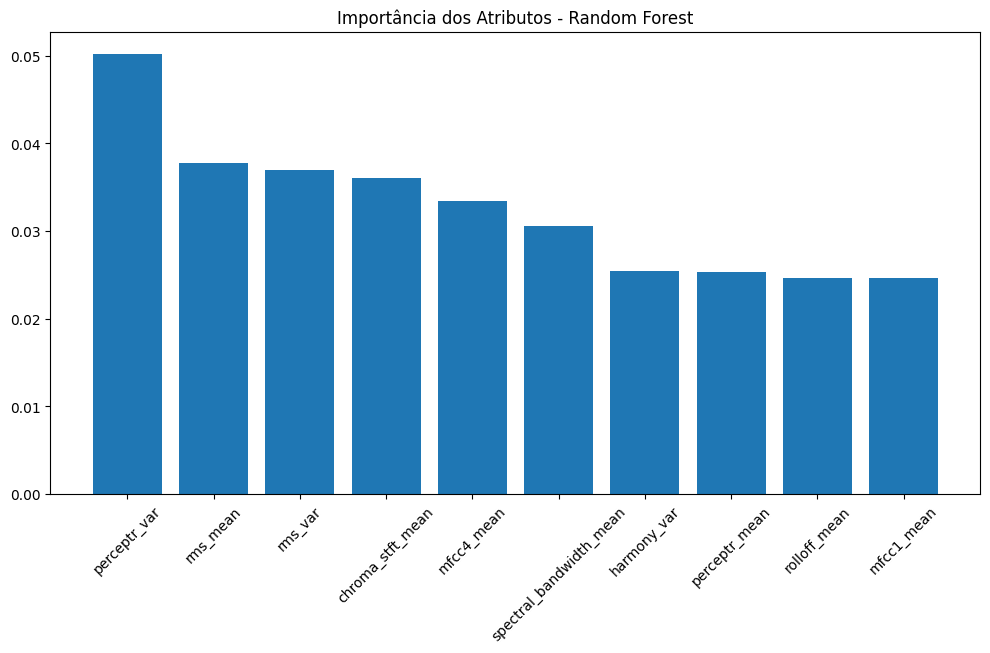

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotando import√¢ncia dos atributos do Random Forest
feature_importances = rf_MinMax.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Visualiza√ß√£o das top 10 features
plt.figure(figsize=(12, 6))
plt.title("Import√¢ncia dos Atributos - Random Forest")
plt.bar(range(10), feature_importances[indices[:10]], align="center")
plt.xticks(range(10), [numerical_columns.columns[i] for i in indices[:10]], rotation=45)
plt.show()

## Tuning Random Forest

### Tuning Random Forest com Ajuste de Hiperpar√¢metros atrav√©s do GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Aumentar o paralelismo na CPU e ajustar hiperpar√¢metros
rf_param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Definir o scoring com v√°rias m√©tricas
scoring = ['accuracy', 'f1', 'average_precision']

# Usar 'accuracy' como m√©trica principal para refit
rf_grid_search_accuracy = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_grid,
    cv=5,
    scoring=scoring,
    refit='accuracy',
    n_jobs=-1
)

rf_grid_search_MinMax = rf_grid_search_accuracy

# Treinar o modelo com o grid search
rf_grid_search_MinMax.fit(X_train_MinMax, y_train_MinMax)

# Avaliar a Random Forest com Normaliza√ß√£o MinMax
rf_MinMax_best_model_accuracy = rf_grid_search_accuracy.best_estimator_
print(f"Melhor Modelo Random Forest Accuracy: {rf_MinMax_best_model_accuracy}")

print("\n----------############----------\n")

print("Relat√≥rio de Classifica√ß√£o do Random Forest Ajustado MinMax:")
rf_predictions_MinMax = rf_MinMax_best_model_accuracy.predict(X_test_MinMax)
print(classification_report(y_test_MinMax, rf_predictions_MinMax))

print("\n----------############----------\n")

print("Matriz de Confus√£o do Random Forest Ajustado MinMax:")
print(confusion_matrix(y_test_MinMax, rf_predictions_MinMax))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


## Resumo dos Resultados do Random Forest at√© aqui

Inicialmente, ao verificar a conformidade entre os dois datasets (em rela√ß√£o a normaliza√ß√£o, n√∫mero de par√¢metros e natureza dos dados), foi decidido realizar o procedimento de ajustes de hiperpar√¢metros atrav√©s do dataset menor (1MB), que possui bem menos registros, o que acelera o processo de computa√ß√£o, mas apresenta m√©tricas de qualidade inferiores (afinal, quando mais dados, melhor). Logo, os resultads obtidos foram razo√°veis de acordo com o tamanho do dataset, que √© 10x menor que o dataset maior:

<br>

- **Acur√°cia**: Em torno de **66%** para a maioria dos modelos.

- **F1-score**: ponderado e n√£o ponderado permanece pr√≥ximo de **66%**.

- **M√©tricas por Classe**: Algumas classes, como `blues`, `classical`, `metal`, e `jazz`, t√™m consistentemente melhores resultados em todas as m√©tricas. No entanto, classes como `rock`, `reggae`, e `disco` mostram desempenho inferior, com f1-scores variando entre **0.30** e **0.50**.

<br>

### Insights sobre o comportamento dos modelos

- **Converg√™ncia de Resultados:** Mesmo variando a m√©trica usada para o refit (acur√°cia, f1, average_precision, etc.), os resultados n√£o variaram significativamente. Muito provavelmente, o modelo de Random Forest pode estar atingindo o seu limite para esse conjunto de dados e essa configura√ß√£o de hiperpar√¢metros.

- **Desequil√≠brio nas Classes:** O modelo est√° tendo dificuldade em separar as classes, talvez por similaridades nos dados ou um desequil√≠brio entre as classes no conjunto de treinamento.

- **Hiperpar√¢metros e Estabilidade:** O uso de diferentes valores de hiperpar√¢metros no Random Forest parece n√£o ter causado um impacto significativo nas m√©tricas. A varia√ß√£o entre o n√∫mero de `estimators`,  `max_depth` (**profundidade m√°xima**) e o n√∫mero m√≠nimo de amostras por leaf (`min_sample_leaf`) n√£o ocasionou melhorias significativas.

<br>

### √öltimos Ajustes

Os resultados sugerem que **o modelo Random Forest est√° atingindo o limite de performance para este conjunto de dados e suas caracter√≠sticas**. No entanto, mais alguns ajustes podem serem tentados para saber se de fato n√£o h√° muita margem de melhoria das m√©tricas do modelo.

<br>

#### 1. **Lidar com o Desequil√≠brio de Classes**
   - Ser√° utilizado a t√©cnica **SMOTE** (Synthetic Minority Over-sampling Technique) para aumentar as inst√¢ncias de classes menos representadas.

<br>

#### 2. **Ajuste de Hiperpar√¢metros com Random Search ou BayesSearchCV**
   - M√©todos que exploram de forma mais abrangente o espa√ßo de busca em compara√ß√£o ao GridSearch, que testa todas as combina√ß√µes exaustivamente.
   - Ser√° aumentado o n√∫mero de folds no cross-validation para algo maior que 5 para proporcionar uma estimativa mais robusta da generaliza√ß√£o do modelo.

<br>

#### 3. Testar outras propor√ß√µes de divis√£o do conjunto de dados Test x Train
  - Outras propor√ß√µes de divis√£o do conjunto de dados do dataset, em treino e teste, ser√£o testadas, buscando a propor√ß√£o que traga a melor acur√°cia geral, assim como outras m√©tricas de qualidade relacionadas a tarefa de classifica√ß√£o.

  <br>

### Ap√≥s Ajustes

  - Aproveitando todos os passos realizados at√© agora de ajustes no dataset menor at√© alcan√ßar seu limite de performance, todo o processamento realizado ser√° reproduzido novamente com o dataset maior, j√° que os dois representam a mesma coisa, variando apenas no volume de dados. Assim, as m√©tricas de qualidade tendem a crescer de forma consider√°vel, considerando que o volume para treinamento √© maior e tamb√©m j√° foram encontrados hiperpar√¢metros ideias para alcan√ßar o limite de performance no conjunto de dados disponibilizado.

  - Dessa forma, at√© para maior clareza do notebook, todos os procedimentos realizados nesse notebook no dataset menor, ser√£o substitu√≠dos para visualiza√ß√£o direta do dataset maior, ao ser conclu√≠do o treinamento do modelo.

### 1. Lidando com o Desequil√≠brio de Classes no Random Forest

#### ‚úîÔ∏è **Aplica√ß√£o da T√©cnica SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicando SMOTE para lidar com o desequil√≠brio de classes
smote = SMOTE(random_state=42)

X_train_MinMax_resampled, y_train_MinMax_resampled = smote.fit_resample(X_train_MinMax, y_train_MinMax)

### 2. Tuning Random Forest com Ajuste de Hiperpar√¢metros atrav√©s do RandomizedSearchCV e do BayesSearchCV

#### ‚úîÔ∏è **Ajuste de Hiperpar√¢metros com RandomSearch e BayesSearch** == *busca otimizada com a mesma entrega, em rela√ß√£o ao* ***GridSearchCV***

In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Definindo os hiperpar√¢metros para Random Forest
param_dist = {
    'n_estimators': [400, 500, 600, 700, 800],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Defini√ß√£o RandomSearchCV com folds de 5 no CV
rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
                               param_distributions=param_dist,
                               n_iter=10,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

# Defini√ß√£o BayesSearchCV (otimiza√ß√£o bayesiana) com folds de 5 no CV
rf_bayes = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    search_spaces=param_dist,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42
)

rf_random_MinMax, rf_bayes_MinMax = rf_random, rf_bayes
rf_random_MinMax2, rf_bayes_MinMax2 = rf_random, rf_bayes

#### ‚úîÔ∏è **CV de 5 folds** == *√≥timo desempenho na generaliza√ß√£o*




In [ ]:
# Treinando o modelo com RandomSearchCV e 5 folds no CV
rf_random_MinMax.fit(X_train_MinMax_resampled, y_train_MinMax_resampled)
rf_random_MinMax_best = rf_random_MinMax.best_estimator_
rf_random_MinMax_predictions = rf_random_MinMax_best.predict(X_test_MinMax)
print(f"Melhores par√¢metros encontrados pelo RandomSearchCV: {rf_random_MinMax.best_params_}")
print(classification_report(y_test_MinMax, rf_random_MinMax_predictions))

# Treinando o modelo com BayesSearchCV e 5 folds no CV
rf_bayes_MinMax.fit(X_train_MinMax_resampled, y_train_MinMax_resampled)
rf_bayes_MinMax_best = rf_bayes_MinMax.best_estimator_
rf_bayes_MinMax_predictions = rf_bayes_MinMax_best.predict(X_test_MinMax)
print(f"Melhores par√¢metros encontrados pelo BayesSearchCV: {rf_bayes_MinMax.best_params_}")
print(classification_report(y_test_MinMax, rf_bayes_MinMax_predictions))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores par√¢metros encontrados pelo RandomSearchCV: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
              precision    recall  f1-score   support

       blues       0.91      0.87      0.89       319
   classical       0.92      0.97      0.95       308
     country       0.79      0.84      0.81       286
       disco       0.87      0.87      0.87       301
      hiphop       0.93      0.91      0.92       311
        jazz       0.88      0.92      0.90       286
       metal       0.94      0.95      0.94       303
         pop       0.90      0.94      0.92       267
      reggae       0.92      0.89      0.90       316
        rock       0.88      0.78      0.82       300

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997

Melhores par√¢metros

#### ‚ùå **CV de 10 folds** == *muitos recursos computacionais para treinamento, mas sem justificativa nas m√©tricas*

In [ ]:
# Treinando o modelo com RandomSearchCV e mais de 5 folds no CV
rf_random_MinMax2.set_params(cv=10)

rf_random_MinMax2.fit(X_train_MinMax_resampled, y_train_MinMax_resampled)
rf_random_MinMax2_best = rf_random_MinMax2.best_estimator_
rf_random_MinMax2_predictions = rf_random_MinMax2_best.predict(X_test_MinMax)
print(f"Melhores par√¢metros encontrados pelo RandomSearchCV com CV > 5: {rf_random_MinMax2.best_params_}")
print(classification_report(y_test_MinMax, rf_random_MinMax2_predictions))

# Treinando o modelo com BayesSearchCV e mais de 5 folds no CV
rf_bayes_MinMax2.set_params(cv=10)

rf_bayes_MinMax2.fit(X_train_MinMax_resampled, y_train_MinMax_resampled)
rf_bayes_MinMax2_best = rf_bayes_MinMax2.best_estimator_
rf_bayes_MinMax2_predictions = rf_bayes_MinMax2_best.predict(X_test_MinMax)
print(f"Melhores par√¢metros encontrados pelo BayesSearchCV com CV > 5: {rf_bayes_MinMax2.best_params_}")
print(classification_report(y_test_MinMax, rf_bayes_MinMax2_predictions))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Melhores par√¢metros encontrados pelo RandomSearchCV com CV > 5: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
              precision    recall  f1-score   support

       blues       0.91      0.87      0.89       319
   classical       0.92      0.97      0.95       308
     country       0.79      0.84      0.81       286
       disco       0.87      0.87      0.87       301
      hiphop       0.93      0.91      0.92       311
        jazz       0.88      0.92      0.90       286
       metal       0.94      0.95      0.94       303
         pop       0.90      0.94      0.92       267
      reggae       0.92      0.89      0.90       316
        rock       0.88      0.78      0.82       300

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Melhores par√¢metros encontrados pelo BayesSearchCV com CV > 5: OrderedDict([('bootstrap', False), ('max_depth', 50), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 800)])
              precision    recall  f1-score   support

       blues       0.91      0.87      0.89       319
   classical       0.92      0.97      0.94       308
     country       0.80      0.82      0.81       286
       disco       0.87      0.87      0.87       301
      hiphop       0.94      0.90      0.92       311
        jazz       0.87      0.92      0.89       286
       metal       0.94      0.95      0.94       303
         pop       0.91      0.95      0.93       267
      reggae       0.91      0.89      0.90       316
        rock       0.87      0.79      0.83       300

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



### 3. Testando outras propor√ß√µes de divis√£o do conjunto de dados de Teste e Treino

- Outros samples de teste, criados a partir do mesmo conjunto de dados mas tendo como diferencial o volume separado para treino e teste, ser√£o utilizados com as mesmas t√©cnicas de tratamento praticados at√© aqui. A divis√£o original estabelece uma propor√ß√£o **70-30** entre conjuntos teste e treino. As divis√µes a serem testadas s√£o a **80-20**, **90-10** e por fim **95-05**, buscando a combina√ß√£o que leve o modelo as melhores m√©tricas no relat√≥rio de classifica√ß√£o.

#### **Divis√£o 80-20** == *boa generaliza√ß√£o*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ------- Divis√£o 80-20 ------------
X_train_MinMax2_resampled, y_train_MinMax2_resampled = smote.fit_resample(X_train_MinMax2, y_train_MinMax2)

# Treinando o modelo com RandomSearchCV e mais de 5 folds no CV
rf_random_MinMax2.set_params(cv=5)

rf_random_MinMax2.fit(X_train_MinMax2_resampled, y_train_MinMax2_resampled)
rf_random_MinMax2_best = rf_random_MinMax2.best_estimator_
rf_random_MinMax2_predictions = rf_random_MinMax2_best.predict(X_test_MinMax2)
print(f"Melhores par√¢metros encontrados pelo RandomSearchCV com CV=5 e Divis√£o 80-20: {rf_random_MinMax2.best_params_}")
print(classification_report(y_test_MinMax2, rf_random_MinMax2_predictions))

# Treinando o modelo com BayesSearchCV e mais de 5 folds no CV
rf_bayes_MinMax2.set_params(cv=5)

rf_bayes_MinMax2.fit(X_train_MinMax2_resampled, y_train_MinMax2_resampled)
rf_bayes_MinMax2_best = rf_bayes_MinMax2.best_estimator_
rf_bayes_MinMax2_predictions = rf_bayes_MinMax2_best.predict(X_test_MinMax2)
print(f"Melhores par√¢metros encontrados pelo BayesSearchCV com CV=5 e Divis√£o 80-20: {rf_bayes_MinMax2.best_params_}")
print(classification_report(y_test_MinMax2, rf_bayes_MinMax2_predictions))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores par√¢metros encontrados pelo RandomSearchCV com CV=5 e Divis√£o 80-20: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
              precision    recall  f1-score   support

       blues       0.91      0.89      0.90       208
   classical       0.93      0.98      0.95       203
     country       0.81      0.84      0.83       186
       disco       0.91      0.87      0.89       199
      hiphop       0.94      0.91      0.93       218
        jazz       0.89      0.93      0.91       192
       metal       0.92      0.97      0.94       204
         pop       0.94      0.96      0.95       180
      reggae       0.91      0.91      0.91       211
        rock       0.90      0.80      0.85       197

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      

#### ‚úîÔ∏è **Divis√£o 90-10** == *melhor generaliza√ß√£o alcan√ßada*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ------- Divis√£o 90-10 ------------
X_train_MinMax3_resampled, y_train_MinMax3_resampled = smote.fit_resample(X_train_MinMax3, y_train_MinMax3)

# Treinando o modelo com RandomSearchCV e mais de 5 folds no CV
rf_random_MinMax2.set_params(cv=5)

rf_random_MinMax2.fit(X_train_MinMax3_resampled, y_train_MinMax3_resampled)
rf_random_MinMax3_best = rf_random_MinMax2.best_estimator_
rf_random_MinMax3_predictions = rf_random_MinMax3_best.predict(X_test_MinMax3)
print(f"Melhores par√¢metros encontrados pelo RandomSearchCV com CV=5 e Divis√£o 90-10: {rf_random_MinMax2.best_params_}")
print(classification_report(y_test_MinMax3, rf_random_MinMax3_predictions))

# Treinando o modelo com BayesSearchCV e mais de 5 folds no CV
rf_bayes_MinMax2.set_params(cv=5)

rf_bayes_MinMax2.fit(X_train_MinMax3_resampled, y_train_MinMax3_resampled)
rf_bayes_MinMax3_best = rf_bayes_MinMax2.best_estimator_
rf_bayes_MinMax3_predictions = rf_bayes_MinMax3_best.predict(X_test_MinMax3)
print(f"Melhores par√¢metros encontrados pelo BayesSearchCV com CV=5 e Divis√£o 90-10: {rf_bayes_MinMax2.best_params_}")
print(classification_report(y_test_MinMax3, rf_bayes_MinMax3_predictions))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores par√¢metros encontrados pelo RandomSearchCV com CV=5 e Divis√£o 90-10: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
              precision    recall  f1-score   support

       blues       0.95      0.96      0.96       111
   classical       0.92      0.98      0.95       101
     country       0.84      0.89      0.86        93
       disco       0.90      0.87      0.89        98
      hiphop       0.97      0.91      0.94       106
        jazz       0.90      0.93      0.92       107
       metal       0.91      0.97      0.94        86
         pop       0.95      0.96      0.96        78
      reggae       0.94      0.91      0.92       108
        rock       0.89      0.81      0.85       111

    accuracy                           0.92       999
   macro avg       0.92      0.92      0.92       999
weighted avg       0.92      0.92      0.92      

#### ‚ùå **Divis√£o 95-05** == *tend√™ncia de* ***overfitting***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ------- Divis√£o 95-05 ------------
X_train_MinMax4_resampled, y_train_MinMax4_resampled = smote.fit_resample(X_train_MinMax4, y_train_MinMax4)

# Treinando o modelo com RandomSearchCV e mais de 5 folds no CV
rf_random_MinMax2.set_params(cv=5)

rf_random_MinMax2.fit(X_train_MinMax4_resampled, y_train_MinMax4_resampled)
rf_random_MinMax4_best = rf_random_MinMax2.best_estimator_
rf_random_MinMax4_predictions = rf_random_MinMax4_best.predict(X_test_MinMax4)
print(f"Melhores par√¢metros encontrados pelo RandomSearchCV com CV=5 e Divis√£o 95-05: {rf_random_MinMax2.best_params_}")
print(classification_report(y_test_MinMax4, rf_random_MinMax4_predictions))

# Treinando o modelo com BayesSearchCV e mais de 5 folds no CV
rf_bayes_MinMax2.set_params(cv=5)

rf_bayes_MinMax2.fit(X_train_MinMax4_resampled, y_train_MinMax4_resampled)
rf_bayes_MinMax4_best = rf_bayes_MinMax2.best_estimator_
rf_bayes_MinMax4_predictions = rf_bayes_MinMax4_best.predict(X_test_MinMax4)
print(f"Melhores par√¢metros encontrados pelo BayesSearchCV com CV=5 e Divis√£o 95-05: {rf_bayes_MinMax2.best_params_}")
print(classification_report(y_test_MinMax4, rf_bayes_MinMax4_predictions))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores par√¢metros encontrados pelo RandomSearchCV com CV=5 e Divis√£o 95-05: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
              precision    recall  f1-score   support

       blues       0.95      0.95      0.95        56
   classical       0.88      0.96      0.92        51
     country       0.86      0.85      0.85        52
       disco       0.91      0.83      0.87        47
      hiphop       0.98      0.92      0.95        59
        jazz       0.87      0.90      0.89        52
       metal       0.88      0.95      0.92        40
         pop       0.95      0.97      0.96        37
      reggae       0.92      0.90      0.91        51
        rock       0.87      0.85      0.86        55

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91      

---

<br>


> # üöÄ **Modelo Escolhido**

  ```
  Melhores par√¢metros encontrados pelo BayesSearchCV com CV=5 e Divis√£o 90-10:
    OrderedDict(
        [
          ('bootstrap', False), ('max_depth', 50),
          ('min_samples_leaf', 1), ('min_samples_split', 2),
          ('n_estimators', 800)
        ]
      )
      
              precision    recall  f1-score   support

       blues       0.95      0.96      0.96       111
   classical       0.92      0.98      0.95       101
     country       0.84      0.90      0.87        93
       disco       0.91      0.86      0.88        98
      hiphop       0.97      0.91      0.94       106
        jazz       0.90      0.93      0.92       107
       metal       0.91      0.97      0.94        86
         pop       0.95      0.97      0.96        78
      reggae       0.94      0.91      0.92       108
        rock       0.89      0.81      0.85       111

    accuracy                           0.92       999
   macro avg       0.92      0.92      0.92       999
weighted avg       0.92      0.92      0.92       999
  ```
  
  Ap√≥s realizar diversas tentativas de treinamento e ajustes de hiperpar√¢metros, o modelo selecionado como **modelo final** √© o **RandomForestClassifier**, otimizado utilizando a t√©cnica de busca bayesiana (**BayesSearchCV**). Esse modelo apresentou os melhores resultados nas m√©tricas de desempenho (**acur√°cia**, **precision**, **recall** e **f1-score**) sendo capaz de generalizar bem para diferentes classes do problema de classifica√ß√£o de g√™neros musicais.

<br>

### Estrutura e Configura√ß√£o do Modelo

- **Algoritmo Base**: RandomForestClassifier
- **T√©cnica de Normaliza√ß√£o**: MinMax Scaler
- **T√©cnica de Otimiza√ß√£o de Hiperpar√¢metros**: BayesSearchCV
- **Valida√ß√£o Cruzada (Cross-validation)**: 5 folds (subconjuntos)
- **T√©cnica de Balanceamento de Classes**: SMOTE (Synthetic Minority Over-sampling Technique)
- **Divis√£o do Conjunto de Dados**: 90% treino e 10% teste
- **M√©tricas de Avalia√ß√£o**: acur√°cia, precision, recall, f1-score

<br>

### T√©cnica de Normaliza√ß√£o

O modelo foi normalizado usando o **Min Max Scaler**. O impacto real do uso dessa normaliza√ß√£o n√£o foi estimado, tanto que ao testar com outra t√©cnica, a **Standarlization**, os resultados obtidos foram similares.

<br>

### Hiperpar√¢metros Otimizados

Os hiperpar√¢metros selecionados automaticamente pelo **BayesSearchCV** foram:
- **bootstrap**: False
- **max_depth**: 50
- **min_samples_leaf**: 1
- **min_samples_split**: 2
- **n_estimators**: 800

<br>

### Cross-validation

O modelo foi avaliado utilizando a t√©cnica de **cross-validation** com **5 folds**, que divide o conjunto de dados em cinco subconjuntos e avalia o modelo em cada um deles. Esse processo garante que o modelo seja validado em diferentes partes do dataset, minimizando o risco de overfitting e proporcionando uma avalia√ß√£o mais robusta do desempenho do modelo em diferentes cen√°rios.

<br>

### Uso do SMOTE para Balanceamento de Classes

O dataset original apresentava um desequil√≠brio nas classes, o que poderia prejudicar o desempenho do modelo em prever corretamente g√™neros musicais com menos exemplos. Como solu√ß√£o, foi aplicado o **SMOTE**, que gera exemplos sint√©ticos para as classes minorit√°rias. A aplica√ß√£o do SMOTE resultou em uma melhora significativa nas m√©tricas, especialmente para classes com menos exemplos, como **rock** e **disco**, no entanto, todas as classes foram beneficiadas.

<br>

### Compara√ß√£o com outros modelos

Diversas configura√ß√µes de modelos foram testadas ao longo do processo de desenvolvimento, variando entre o uso de **RandomSearchCV** e **BayesSearchCV** para a otimiza√ß√£o de hiperpar√¢metros (**GridSearchCV** foi descartado, por sua gigantesca necessidade computacional para simular todas as combina√ß√µes poss√≠veis, sendo que os dois primeiros citados trouxeram resultados mais expressivos), al√©m de diferentes propor√ß√µes de divis√£o entre treino e teste, como 70-30, 80-20, 90-10, e 95-05.

- **Modelos com divis√£o 70-30** e **80-20** apresentaram uma performance inferior, especialmente em classes com menos dados, devido √† menor quantidade de exemplos usados no treino.
- A divis√£o **95-05** resultou em uma tend√™ncia de overfitting, com o modelo aprendendo demais a partir do conjunto de treino e generalizando mal nos dados de teste.
- A divis√£o **90-10**, escolhida para o modelo final, mostrou-se ideal, proporcionando uma quantidade suficiente de dados para treino e um conjunto de teste robusto para valida√ß√£o.

<br>

### M√©tricas Finais

Os resultados finais obtidos a partir da avalia√ß√£o no conjunto de teste foram:

- **Acur√°cia geral**: 92%
- **Precision m√©dia**: 92%
- **Recall m√©dio**: 92%
- **F1-score m√©dio**: 92%

Esses valores demonstram a capacidade do modelo de generalizar bem para o conjunto de dados. O modelo apresentou √≥timos resultados em classes como **blues** (f1-score de 0.96), **classical** (f1-score de 0.95) e **pop** (f1-score de 0.96), mostrando-se eficaz tanto em classes majorit√°rias quanto em classes minorit√°rias, como **rock** (f1-score de 0.85) e **reggae** (f1-score de 0.92).
  